# Algorithmes de recherche

La recherche du plus court chemin est un problème fondamental en informatique qui consiste à trouver le chemin optimal entre deux points dans un espace donné.

 Ce défi, en apparence simple, cache une complexité importante qui a donné naissance à de nombreux algorithmes, chacun adapté à des contextes spécifiques.

### Diversité des approches algorithmiques

Plusieurs algorithmes majeurs ont été développés pour résoudre ce problème :

- **Dijkstra (1959)** : Pionnier dans ce domaine, cet algorithme garantit de trouver le plus court chemin dans un graphe pondéré positivement.
- **Bellman-Ford (1958)** : Capable de gérer les graphes avec des poids négatifs, utile notamment en économie et en routage réseau.
- **Floyd-Warshall** : Calcule les plus courts chemins entre toutes les paires de sommets d'un graphe.
- **A*** : Combine l'exactitude de Dijkstra avec une approche heuristique pour une recherche plus efficace.

### Applications dans le monde réel

#### 1. Transport et Navigation
Les systèmes de navigation modernes utilisent ces algorithmes pour :
- Calculer des itinéraires optimaux en temps réel
- Gérer le trafic urbain et proposer des alternatives en cas d'embouteillage
- Optimiser les réseaux de transport en commun

#### 2. Réseaux et Télécommunications
Dans les infrastructures réseau, ces algorithmes sont essentiels pour :
- Router les paquets de données efficacement
- Gérer la redondance et la tolérance aux pannes
- Optimiser la bande passante des réseaux

#### 3. Robotique et Intelligence Artificielle
Les systèmes autonomes s'appuient sur ces algorithmes pour :
- Planifier des trajectoires sûres et efficaces
- Éviter les obstacles en temps réel
- Coordonner des flottes de robots

#### 4. Jeux et Simulation
L'industrie du divertissement les utilise pour :
- Créer des comportements réalistes pour les personnages non-joueurs
- Générer des environnements navigables
- Simuler des scénarios de circulation

### Critères de choix d'un algorithme

Le choix de l'algorithme dépend de plusieurs facteurs :

1. **Nature du problème**
   - Taille de l'espace de recherche
   - Présence de contraintes spécifiques
   - Dynamisme de l'environnement

2. **Contraintes techniques**
   - Temps de calcul disponible
   - Ressources mémoire
   - Précision requise

3. **Caractéristiques des données**
   - Structure du graphe
   - Nature des poids (positifs, négatifs)
   - Fréquence des mises à jour

Cette diversité d'algorithmes et d'applications montre l'importance fondamentale de la recherche de chemin dans l'informatique moderne, où chaque approche apporte ses avantages spécifiques selon le contexte d'utilisation.

## Mesures de distance courantes

### Distance de Manhattan

La distance de Manhattan (aussi appelée taxi-distance) est une heuristique couramment utilisée dans A* pour les grilles où les déplacements sont limités aux directions horizontales et verticales.

Pour deux points de coordonnées $(x1, y1)$ et $(x2, y2)$, la distance de Manhattan est calculée par :

$h = |x1 - x2| + |y1 - y2|$

Où $x1, y1$ sont les coordonnées du point de départ et $x2, y2$ sont les coordonnées du point d'arrivée.

On prend la valeur absolue de la différence entre les coordonnées $x$ et $y$.

![Distance de Manhattan](https://upload.wikimedia.org/wikipedia/commons/thumb/0/08/Manhattan_distance.svg/520px-Manhattan_distance.svg.png)

Cette heuristique est particulièrement adaptée quand :
- Les déplacements ne peuvent se faire qu'horizontalement et verticalement
- Tous les déplacements ont un coût unitaire
- Il n'y a pas d'obstacles à prendre en compte

In [ ]:
from heapq import heappush, heappop
import matplotlib.pyplot as plt
import numpy as np

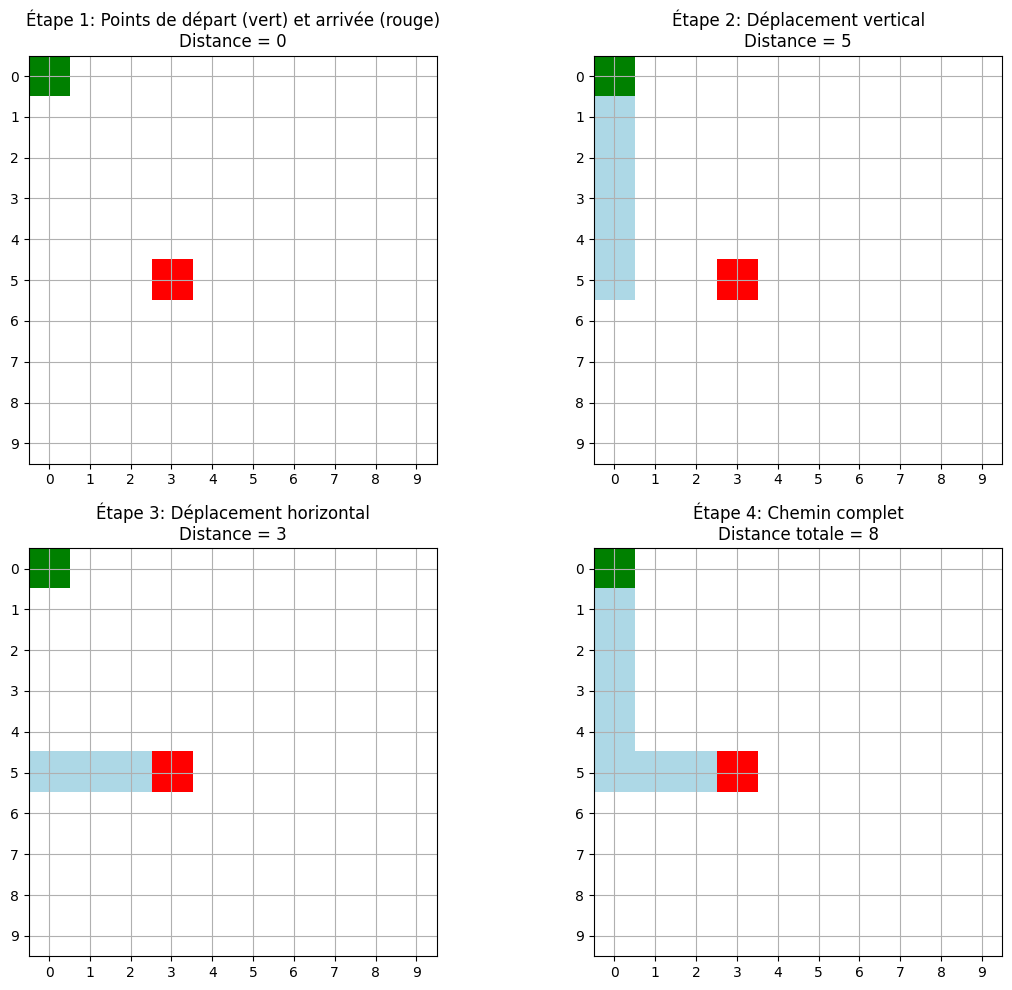

In [2]:
# Algorithme simple permettant de visualiser l'algorithme de distance de Manhattan étape par étape

def manhattan_distance_visualization(start=(0, 0), end=(5, 3)):
    """
    Visualise la distance de Manhattan entre deux points sur une grille.
    
    Args:
        start (tuple): Coordonnées (x,y) du point de départ
        end (tuple): Coordonnées (x,y) du point d'arrivée
    """
    # Créer une grille 10x10 remplie de zéros
    grid = np.zeros((10, 10))  # 0 = arrière-plan (blanc)

    # Marquer le point de départ (2) et d'arrivée (3) sur la grille
    grid[start] = 2  # 2 = départ (vert)
    grid[end] = 3  # 3 = arrivée (rouge)

    # Préparer la figure avec 4 sous-graphiques (2x2)
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    axes = axes.ravel()  # Convertir le tableau 2D d'axes en 1D pour faciliter l'accès

    # Définir les couleurs pour chaque élément de la visualisation
    colors = {
        "background": "white",  # Fond de la grille
        "path": "lightblue",   # Chemin parcouru
        "start": "green",      # Point de départ
        "end": "red",         # Point d'arrivée
    }

    # Créer une colormap personnalisée pour la visualisation
    cmap = plt.cm.colors.ListedColormap(
        [colors["background"], colors["path"], colors["start"], colors["end"]]
    )

    # Calculer les composantes de la distance de Manhattan
    distance_x = abs(end[0] - start[0])  # Distance horizontale
    distance_y = abs(end[1] - start[1])  # Distance verticale
    total_distance = distance_x + distance_y  # Distance totale de Manhattan

    # Alternative pour calculer la distance de Manhattan en une ligne:
    # distance = abs(end[0] - start[0]) + abs(end[1] - start[1])

    # Étape 1: Afficher uniquement les points de départ et d'arrivée
    axes[0].imshow(grid, cmap=cmap)
    axes[0].set_title(
        "Étape 1: Points de départ (vert) et arrivée (rouge)\nDistance = 0"
    )

    # Étape 2: Visualiser le déplacement vertical
    temp_grid = grid.copy()
    x_range = range(min(start[0], end[0]), max(start[0], end[0]) + 1)
    for x in x_range:
        # Marquer les cases du chemin horizontal, sauf départ et arrivée
        if (x, start[1]) != start and (x, start[1]) != end:
            temp_grid[x, start[1]] = 1
    axes[1].imshow(temp_grid, cmap=cmap)
    axes[1].set_title(f"Étape 2: Déplacement vertical\nDistance = {distance_x}")

    # Étape 3: Visualiser le déplacement horizontal
    temp_grid = grid.copy()
    y_range = range(min(start[1], end[1]), max(start[1], end[1]) + 1)
    for y in y_range:
        # Marquer les cases du chemin vertical, sauf départ et arrivée
        if (end[0], y) != start and (end[0], y) != end:
            temp_grid[end[0], y] = 1
    axes[2].imshow(temp_grid, cmap=cmap)
    axes[2].set_title(f"Étape 3: Déplacement horizontal\nDistance = {distance_y}")

    # Étape 4: Afficher le chemin complet combinant horizontal et vertical
    final_grid = grid.copy()
    # Ajouter le chemin horizontal
    for x in x_range:
        if (x, start[1]) != start and (x, start[1]) != end:
            final_grid[x, start[1]] = 1
    # Ajouter le chemin vertical
    for y in y_range:
        if (end[0], y) != start and (end[0], y) != end:
            final_grid[end[0], y] = 1
    axes[3].imshow(final_grid, cmap=cmap)
    axes[3].set_title(f"Étape 4: Chemin complet\nDistance totale = {total_distance}")

    # Configurer l'apparence des axes pour tous les sous-graphiques
    for ax in axes:
        ax.grid(True)  # Afficher la grille
        ax.set_xticks(range(10))  # Graduations sur l'axe x
        ax.set_yticks(range(10))  # Graduations sur l'axe y

    # Ajuster automatiquement l'espacement entre les sous-graphiques
    plt.tight_layout()
    plt.show()


# Exemple d'utilisation avec les coordonnées par défaut
manhattan_distance_visualization()

### Distance euclidienne

La distance euclidienne est l'heuristique qui correspond à la distance "à vol d'oiseau" entre deux points. Elle est souvent utilisée dans A* pour les environnements où les déplacements peuvent se faire dans toutes les directions.

Pour deux points de coordonnées $(x1, y1)$ et $(x2, y2)$, la distance euclidienne est calculée par :

$h = \sqrt{(x1 - x2)^2 + (y1 - y2)^2}$

Où $x1, y1$ sont les coordonnées du point de départ et $x2, y2$ sont les coordonnées du point d'arrivée.

Cette formule découle directement du théorème de Pythagore appliqué aux différences de coordonnées.

![Distance Euclidienne](https://upload.wikimedia.org/wikipedia/commons/d/d9/Euclidean_distance_in_R.gif?20170920122951)

Cette heuristique est particulièrement adaptée quand :
- Les déplacements peuvent se faire dans toutes les directions
- Le coût du déplacement est proportionnel à la distance
- L'espace est continu ou permet les mouvements diagonaux


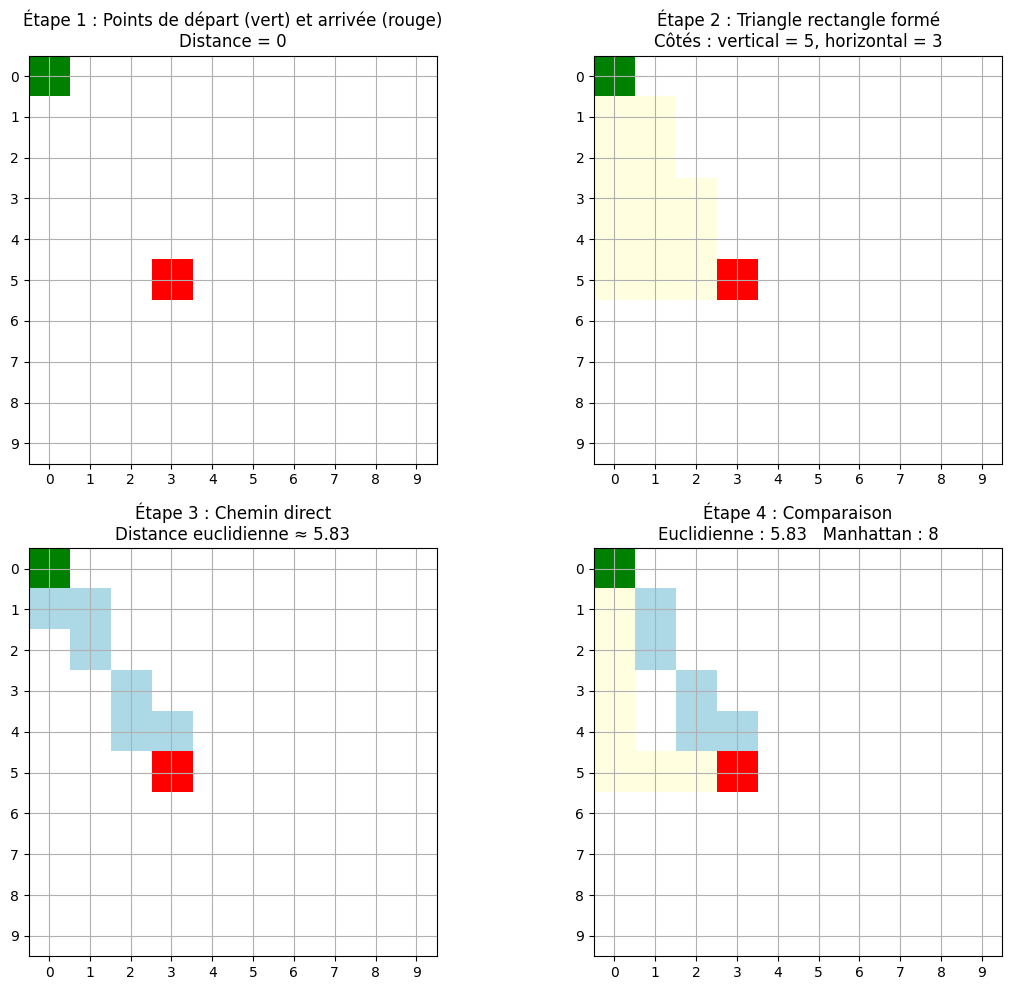

In [3]:
def euclidean_distance_visualization(start=(0, 0), end=(5, 3)):
    # Création d'une grille 10x10
    grid = np.zeros((10, 10), dtype=int)  # 0 = background (blanc)

    # Marquer le point de départ et d'arrivée
    grid[start] = 2  # 2 = start (vert)
    grid[end] = 3  # 3 = end (rouge)

    # Préparer la visualisation en 4 étapes
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    axes = axes.ravel()

    # Définir les couleurs personnalisées
    # Codes : 0 = background, 1 = chemin (euclidien), 2 = start, 3 = end, 4 = zone du triangle / Manhattan
    colors = {
        "background": "white",
        "path": "lightblue",
        "start": "green",
        "end": "red",
        "triangle": "lightyellow",
    }

    # Créer une colormap avec l'ordre suivant
    cmap = plt.cm.colors.ListedColormap(
        [
            colors["background"],  # index 0
            colors["path"],  # index 1
            colors["start"],  # index 2
            colors["end"],  # index 3
            colors["triangle"],  # index 4
        ]
    )

    # Calcul des distances
    distance_x = abs(end[0] - start[0])
    distance_y = abs(end[1] - start[1])
    euclidean_distance = np.sqrt(distance_x**2 + distance_y**2)

    # --- Étape 1 : Affichage de la grille initiale ---
    axes[0].imshow(grid, cmap=cmap, vmin=0, vmax=4)
    axes[0].set_title(
        "Étape 1 : Points de départ (vert) et arrivée (rouge)\nDistance = 0"
    )

    # --- Étape 2 : Dessin du triangle rectangle ---
    # Pour illustrer la géométrie, on va remplir le triangle défini par :
    #   - Le point de départ,
    #   - Le point (end[0], start[1]) (fin de la première extrémité horizontale),
    #   - Le point d'arrivée.
    # Pour simplifier, on suppose ici que start est en haut à gauche de end.
    temp_grid = grid.copy()
    x0, y0 = start
    x1, y1 = end
    # On s'assure que start est bien en haut à gauche de end
    if x0 > x1:
        x0, x1 = x1, x0
    if y0 > y1:
        y0, y1 = y1, y0
    # Pour chaque colonne du triangle, on remplit de y0 jusqu'à la ligne reliant (x0, y0) à (x1, y1)
    for x in range(x0, x1 + 1):
        # Calcul de la limite y sur la droite reliant (x0, y0) à (x1, y1)
        if (x1 - x0) != 0:
            y_limit = y0 + (y1 - y0) * (x - x0) / (x1 - x0)
        else:
            y_limit = y0
        y_limit_int = int(round(y_limit))
        for y in range(y0, y_limit_int + 1):
            if (x, y) not in (start, end):
                temp_grid[x, y] = 4  # Zone du triangle (index 4)
    axes[1].imshow(temp_grid, cmap=cmap, vmin=0, vmax=4)
    axes[1].set_title(
        f"Étape 2 : Triangle rectangle formé\nCôtés : vertical = {distance_x}, horizontal = {distance_y}"
    )

    # --- Étape 3 : Tracé du chemin direct (euclidien) ---
    temp_grid = grid.copy()
    num_points = 20
    x_coords = np.linspace(start[0], end[0], num_points)
    y_coords = np.linspace(start[1], end[1], num_points)
    for x, y in zip(x_coords, y_coords):
        xi = int(round(x))
        yi = int(round(y))
        if (xi, yi) not in (start, end):
            temp_grid[xi, yi] = 1  # Chemin direct en lightblue (index 1)
    axes[2].imshow(temp_grid, cmap=cmap, vmin=0, vmax=4)
    axes[2].set_title(
        f"Étape 3 : Chemin direct\nDistance euclidienne ≈ {euclidean_distance:.2f}"
    )

    # --- Étape 4 : Comparaison entre Euclidien et Manhattan ---
    final_grid = grid.copy()
    # Tracer d'abord le chemin direct (euclidien) comme en étape 3
    for x, y in zip(x_coords, y_coords):
        xi = int(round(x))
        yi = int(round(y))
        if (xi, yi) not in (start, end):
            final_grid[xi, yi] = 1
    # Ensuite, tracer le chemin de Manhattan (aller horizontal puis vertical)
    # On utilise ici le segment horizontal reliant start à (end[0], start[1])
    # puis le segment vertical reliant (end[0], start[1]) à end.
    x_range = range(min(start[0], end[0]), max(start[0], end[0]) + 1)
    y_range = range(min(start[1], end[1]), max(start[1], end[1]) + 1)
    for x in x_range:
        if (x, start[1]) not in (start, end):
            final_grid[x, start[1]] = 4
    for y in y_range:
        if (end[0], y) not in (start, end):
            final_grid[end[0], y] = 4
    axes[3].imshow(final_grid, cmap=cmap, vmin=0, vmax=4)
    axes[3].set_title(
        f"Étape 4 : Comparaison\nEuclidienne : {euclidean_distance:.2f}   "
        f"Manhattan : {distance_x + distance_y}"
    )

    # Configuration des axes pour afficher une grille
    for ax in axes:
        ax.grid(True)
        ax.set_xticks(range(10))
        ax.set_yticks(range(10))

    plt.tight_layout()
    plt.show()


# Exemple d'utilisation
euclidean_distance_visualization()


## Heuristiques courantes

### Algorithme de Dijkstra

L'algorithme porte le nom de son inventeur, l'informaticien néerlandais Edsger Dijkstra, et a été publié en 1959.

Il peut être vu comme un cas particulier de A*, que l'on va voir après où l'heuristique $h(n) = 0$ pour tous les nœuds. 

![Algorithme de Dijkstra](https://upload.wikimedia.org/wikipedia/commons/5/57/Dijkstra_Animation.gif)

Principales caractéristiques :
- Il trouve toujours le chemin le plus court
- Il explore les nœuds en cercles concentriques autour du point de départ
- Il est plus lent que A* car il explore plus de nœuds
- Il est optimal quand on ne dispose pas d'une bonne heuristique

Différences avec A* :
- Dijkstra explore tous les chemins possibles de manière uniforme
- A* utilise une heuristique pour orienter la recherche vers la destination
- A* est généralement plus efficace car il explore moins de nœuds

Le choix entre Dijkstra et A* dépend du problème :
- Utilisez Dijkstra quand vous n'avez pas d'heuristique fiable
- Utilisez A* quand vous pouvez estimer la distance à la destination

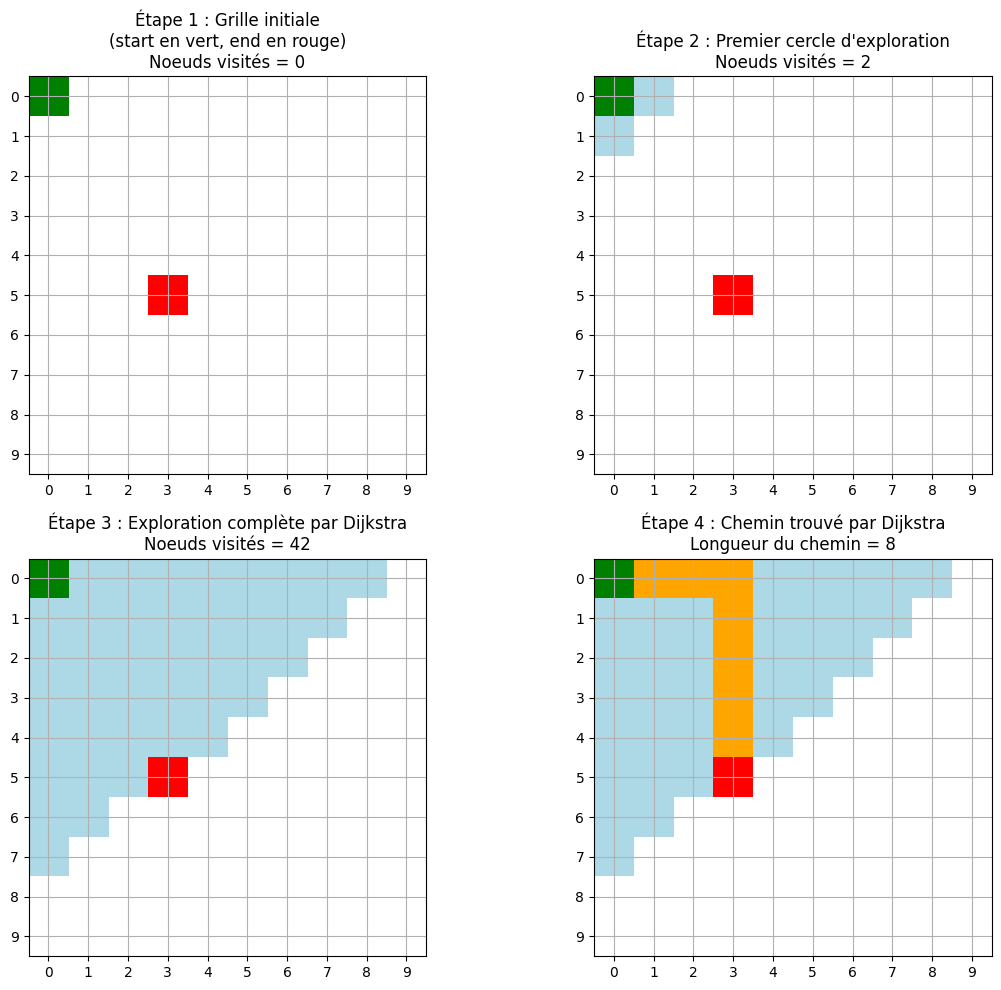

In [4]:
def dijkstra_search(start, end, grid):
    """
    Exécute l'algorithme de Dijkstra sur la grille.
    La grille est modifiée pour marquer les nœuds visités (code 1)
    sauf le point de départ (2) et d'arrivée (3).
    Retourne l'ensemble des nœuds visités et le chemin le plus court.
    """
    # Initialisation des distances pour chaque case (infini par défaut)
    # On crée un dictionnaire avec toutes les cellules de la grille
    distances = {
        (i, j): np.inf for i in range(grid.shape[0]) for j in range(grid.shape[1])
    }
    distances[start] = 0  # La distance du point de départ est 0

    # Dictionnaire qui stocke pour chaque nœud son prédécesseur dans le chemin optimal
    came_from = {}

    # File de priorité qui stocke les nœuds à explorer, triés par distance croissante
    # Chaque élément est un tuple (distance, cellule)
    queue = []
    heappush(queue, (0, start))

    # Ensemble des nœuds déjà visités pour éviter les cycles
    visited_nodes = set()

    # Boucle principale de l'algorithme
    while queue:
        d, current = heappop(queue)  # On prend le nœud le plus proche
        if current in visited_nodes:  # Si déjà visité, on passe au suivant
            continue
        visited_nodes.add(current)  # On marque le nœud comme visité

        # On colorie le nœud visité en bleu clair, sauf départ et arrivée
        if current != start and current != end:
            grid[current] = 1

        # Si on atteint la destination, on peut arrêter
        if current == end:
            break

        # On explore les 4 voisins directs (pas de diagonales)
        for dx, dy in [(0, 1), (1, 0), (0, -1), (-1, 0)]:
            neighbor = (current[0] + dx, current[1] + dy)
            # Vérification que le voisin est dans la grille
            if 0 <= neighbor[0] < grid.shape[0] and 0 <= neighbor[1] < grid.shape[1]:
                new_cost = d + 1  # Coût de 1 pour chaque déplacement
                # Si on trouve un meilleur chemin vers ce voisin
                if new_cost < distances[neighbor]:
                    distances[neighbor] = new_cost
                    came_from[neighbor] = current
                    heappush(queue, (new_cost, neighbor))

    # Reconstruction du chemin optimal en partant de la fin
    path = []
    if end in came_from:  # Si un chemin a été trouvé
        current = end
        while current != start:
            path.append(current)
            current = came_from[current]
        path.reverse()  # On inverse le chemin pour avoir début -> fin

    return visited_nodes, path


def dijkstra_visualization(start=(0, 0), end=(5, 3)):
    """
    Visualise les étapes de l'algorithme de Dijkstra sur une grille 10x10
    """
    # Création d'une grille vide avec des codes couleur:
    # 0 = fond blanc, 1 = visité (bleu clair)
    # 2 = départ (vert), 3 = arrivée (rouge), 4 = chemin final (orange)
    grid = np.zeros((10, 10), dtype=int)
    grid[start] = 2  # Point de départ en vert
    grid[end] = 3    # Point d'arrivée en rouge

    # Configuration des couleurs pour la visualisation
    colors = {
        "background": "white",
        "visited": "lightblue",
        "start": "green",
        "end": "red",
        "path": "orange",
    }
    # Création d'une palette de couleurs personnalisée
    cmap = plt.cm.colors.ListedColormap(
        [
            colors["background"],  # 0
            colors["visited"],     # 1
            colors["start"],       # 2
            colors["end"],         # 3
            colors["path"],        # 4
        ]
    )

    # Création d'une figure avec 4 sous-graphiques (2x2)
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    axes = axes.ravel()  # Conversion en tableau 1D pour faciliter l'accès

    # --- Étape 1 : Affichage de la grille initiale ---
    axes[0].imshow(grid, cmap=cmap, vmin=0, vmax=4)
    axes[0].set_title(
        "Étape 1 : Grille initiale\n(start en vert, end en rouge)\nNoeuds visités = 0"
    )

    # --- Étape 2 : Visualisation du premier niveau d'exploration ---
    grid2 = grid.copy()
    # On marque les 4 voisins directs du point de départ
    neighbors = [
        (start[0] + 1, start[1]),
        (start[0] - 1, start[1]),
        (start[0], start[1] + 1),
        (start[0], start[1] - 1),
    ]
    visited_count = 0
    for n in neighbors:
        if 0 <= n[0] < 10 and 0 <= n[1] < 10 and n != end:
            grid2[n] = 1  # marquer comme visité
            visited_count += 1
    axes[1].imshow(grid2, cmap=cmap, vmin=0, vmax=4)
    axes[1].set_title(
        f"Étape 2 : Premier cercle d'exploration\nNoeuds visités = {visited_count}"
    )

    # --- Étape 3 : Exécution complète de l'algorithme ---
    grid3 = grid.copy()
    visited_nodes, path = dijkstra_search(start, end, grid3)
    axes[2].imshow(grid3, cmap=cmap, vmin=0, vmax=4)
    axes[2].set_title(
        f"Étape 3 : Exploration complète par Dijkstra\nNoeuds visités = {len(visited_nodes)}"
    )

    # --- Étape 4 : Affichage du chemin optimal trouvé ---
    grid4 = grid3.copy()
    # On colorie le chemin optimal en orange
    for cell in path:
        if cell != start and cell != end:
            grid4[cell] = 4
    axes[3].imshow(grid4, cmap=cmap, vmin=0, vmax=4)
    axes[3].set_title(
        f"Étape 4 : Chemin trouvé par Dijkstra\nLongueur du chemin = {len(path)}"
    )

    # Ajout d'une grille sur chaque graphique
    for ax in axes:
        ax.grid(True)
        ax.set_xticks(range(10))
        ax.set_yticks(range(10))

    plt.tight_layout()
    plt.show()


# Exemple d'utilisation avec les coordonnées par défaut
dijkstra_visualization()


### Algorithme A*

L'algorithme A* est une technique de recherche de chemin largement utilisée en intelligence artificielle et en informatique. Il permet de trouver le chemin optimal entre un point de départ et une destination en tenant compte des coûts et heuristiques associées aux déplacements.

**Illustration du fonctionnement de l'algorithme A\* sur une grille :**

![Illustration de l'algorithme A*](https://upload.wikimedia.org/wikipedia/commons/thumb/f/f4/Pathfinding_A_Star.svg/langfr-800px-Pathfinding_A_Star.svg.png)

Dans cette image, on peut observer :
- La case verte représente la case de départ
- La case bleue représente la case d'arrivée
- Les cases grises sont les obstacles que l'algorithme doit éviter
- Les cases rouges sont les cases que l'algorithme a identifiées comme étant dans le chemin optimal

L'algorithme A* explore progressivement les cases en évaluant pour chacune :
- Le coût réel du chemin depuis le départ ($g$)
- Une estimation heuristique de la distance restante jusqu'à l'arrivée ($h$)
- La somme $f = g + h$ qui permet de choisir le prochain noeud à explorer

## Fonctionnement de l'algorithme A*

**Gif illustrant le fonctionnement de l'algorithme A\* :**

![Gif illustrant le fonctionnement de l'algorithme A*](https://upload.wikimedia.org/wikipedia/commons/c/c2/Astarpathfinding.gif)

L'algorithme A* fonctionne selon les principes suivants :

1. Il maintient deux listes :
   - Une liste ouverte contenant les nœuds à explorer
   - Une liste fermée contenant les nœuds déjà explorés

2. Pour chaque nœud, il calcule un score $f(n) = g(n) + h(n)$ où :
   - $g(n)$ est le coût réel du chemin depuis le départ jusqu'au nœud $n$
   - $h(n)$ est une estimation heuristique du coût restant jusqu'à l'arrivée

3. À chaque itération :
   - Il sélectionne le nœud avec le plus petit score $f(n)$ dans la liste ouverte
   - Il l'explore en examinant tous ses voisins
   - Il met à jour les scores et les chemins si de meilleurs trajets sont trouvés

4. L'algorithme continue jusqu'à :
   - Atteindre le nœud d'arrivée (succès)
   - Épuiser tous les nœuds possibles (échec)

Cette approche garantit de trouver le chemin optimal si l'heuristique utilisée est admissible 
(c'est-à-dire qu'elle ne surestime jamais le coût réel).

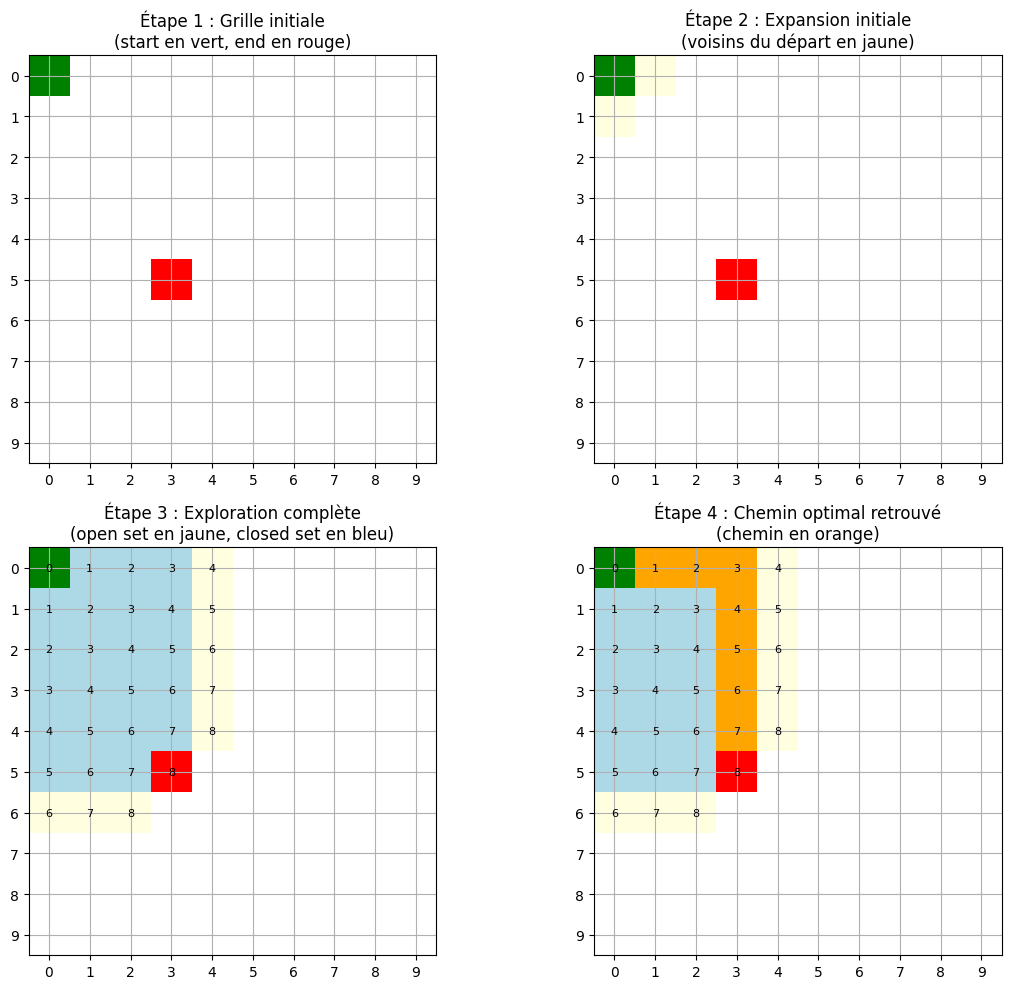

In [5]:
def heuristic(a, b):
    # Distance de Manhattan entre deux points
    return abs(a[0] - b[0]) + abs(a[1] - b[1])


def astar_search(start, end, grid):
    """
    Exécute l'algorithme A* sur la grille.
    La grille est modifiée pour marquer :
      - 1 : nœuds en open set,
      - 4 : nœuds fermés (closed set).
    Les cases du départ (2) et de l'arrivée (3) restent inchangées.
    Retourne le chemin trouvé, l'ensemble des nœuds fermés, et le dictionnaire g_score.
    """
    open_set = []
    heappush(open_set, (heuristic(start, end), start))
    came_from = {}
    g_score = {start: 0}
    closed_set = set()

    while open_set:
        current = heappop(open_set)[1]
        if current == end:
            # Reconstruction du chemin
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.reverse()
            return path, closed_set, g_score

        closed_set.add(current)
        if current != start and current != end:
            grid[current] = 4  # Marquer comme fermé

        # Exploration des 4 voisins (haut, droite, bas, gauche)
        for dx, dy in [(0, 1), (1, 0), (0, -1), (-1, 0)]:
            neighbor = (current[0] + dx, current[1] + dy)
            if 0 <= neighbor[0] < grid.shape[0] and 0 <= neighbor[1] < grid.shape[1]:
                if neighbor in closed_set:
                    continue
                tentative_g = g_score[current] + 1  # Coût constant de 1 par déplacement
                if neighbor not in g_score or tentative_g < g_score[neighbor]:
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g
                    f = tentative_g + heuristic(neighbor, end)
                    heappush(open_set, (f, neighbor))
                    if grid[neighbor] == 0:
                        grid[neighbor] = 1  # Marquer comme open set
    return None, closed_set, g_score  # Aucun chemin trouvé


def a_star_visualization(start=(0, 0), end=(5, 3)):
    """
    Visualise les étapes de l'algorithme A* sur une grille 10x10,
    en affichant la distance (g_score) calculée pour chaque case dans la figure.
    """
    # Définition des codes couleurs pour la visualisation
    # Codes :
    # 0 = fond (non exploré)      -> blanc
    # 1 = open set (à explorer)    -> jaune clair
    # 2 = départ                   -> vert
    # 3 = arrivée                  -> rouge
    # 4 = closed set (exploré)     -> bleu clair
    # 5 = chemin optimal           -> orange
    colors = [
        "white",  # 0
        "lightyellow",  # 1
        "green",  # 2
        "red",  # 3
        "lightblue",  # 4
        "orange",  # 5
    ]
    cmap = plt.cm.colors.ListedColormap(colors)

    # Étape 1 : Création de la grille initiale
    grid0 = np.zeros((10, 10), dtype=int)
    grid0[start] = 2
    grid0[end] = 3

    # Étape 2 : Expansion initiale depuis le départ
    grid1 = grid0.copy()
    for dx, dy in [(0, 1), (1, 0), (0, -1), (-1, 0)]:
        nx, ny = start[0] + dx, start[1] + dy
        if 0 <= nx < 10 and 0 <= ny < 10 and (nx, ny) != end:
            grid1[nx, ny] = 1  # Marquer comme open set

    # Étape 3 : Exécution complète de l'algorithme A*
    grid2 = grid0.copy()
    path, closed_set, g_score = astar_search(start, end, grid2)

    # Étape 4 : Visualisation du chemin optimal
    grid3 = grid2.copy()
    if path is not None:
        for cell in path:
            if cell != start and cell != end:
                grid3[cell] = 5  # Marquer le chemin optimal
    else:
        print("Aucun chemin trouvé.")

    # Création de la figure avec 4 sous-graphes
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    axes = axes.ravel()

    # Affichage de la grille initiale
    axes[0].imshow(grid0, cmap=cmap, vmin=0, vmax=5)
    axes[0].set_title("Étape 1 : Grille initiale\n(start en vert, end en rouge)")

    # Affichage de l'expansion initiale
    axes[1].imshow(grid1, cmap=cmap, vmin=0, vmax=5)
    axes[1].set_title("Étape 2 : Expansion initiale\n(voisins du départ en jaune)")

    # Affichage de l'exploration complète (avec distances)
    axes[2].imshow(grid2, cmap=cmap, vmin=0, vmax=5)
    axes[2].set_title(
        "Étape 3 : Exploration complète\n(open set en jaune, closed set en bleu)"
    )
    # Annotation : affiche la distance (g_score) dans chaque case atteinte
    for i in range(10):
        for j in range(10):
            if (i, j) in g_score:
                axes[2].text(
                    j,
                    i,
                    str(g_score[(i, j)]),
                    ha="center",
                    va="center",
                    fontsize=8,
                    color="black",
                )

    # Affichage du chemin optimal retrouvé (avec distances)
    axes[3].imshow(grid3, cmap=cmap, vmin=0, vmax=5)
    axes[3].set_title("Étape 4 : Chemin optimal retrouvé\n(chemin en orange)")
    # On peut aussi annoter ici les distances
    for i in range(10):
        for j in range(10):
            if (i, j) in g_score:
                axes[3].text(
                    j,
                    i,
                    str(g_score[(i, j)]),
                    ha="center",
                    va="center",
                    fontsize=8,
                    color="black",
                )

    # Configuration des axes (grille)
    for ax in axes:
        ax.grid(True)
        ax.set_xticks(range(10))
        ax.set_yticks(range(10))

    plt.tight_layout()
    plt.show()


# Exemple d'utilisation
a_star_visualization()


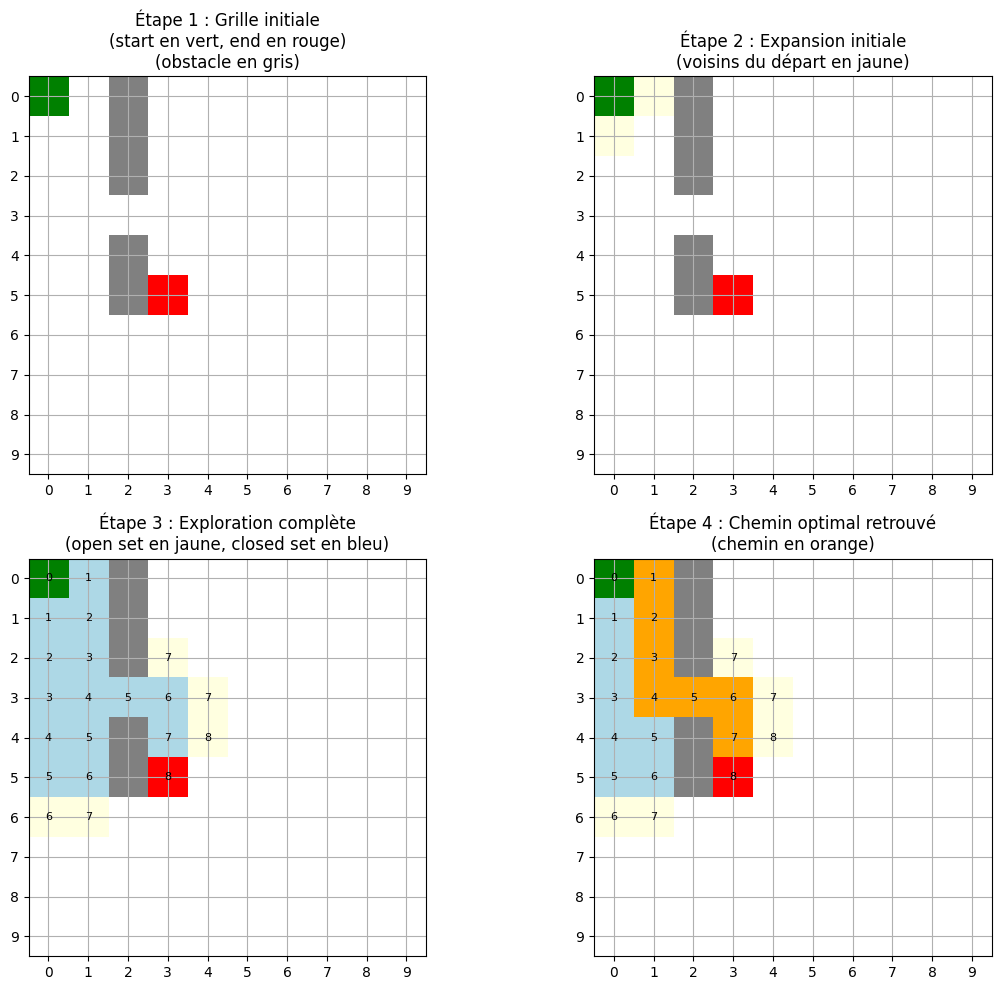

In [6]:
def heuristic2(a, b):
    # Distance de Manhattan entre deux points
    return abs(a[0] - b[0]) + abs(a[1] - b[1])


def astar_search2(start, end, grid):
    """
    Exécute l'algorithme A* sur la grille.
    La grille est modifiée pour marquer :
      - 1 : nœuds en open set,
      - 4 : nœuds fermés (closed set).
    Les cases du départ (2) et de l'arrivée (3) restent inchangées.
    Retourne le chemin trouvé, l'ensemble des nœuds fermés, et le dictionnaire g_score.
    """
    open_set = []
    heappush(open_set, (heuristic2(start, end), start))
    came_from = {}
    g_score = {start: 0}
    closed_set = set()
    OBSTACLE = 6  # Code obstacle

    while open_set:
        current = heappop(open_set)[1]
        if current == end:
            # Reconstruction du chemin
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.reverse()
            return path, closed_set, g_score

        closed_set.add(current)
        if current != start and current != end:
            grid[current] = 4  # Marquer comme fermé

        # Exploration des 4 voisins (haut, droite, bas, gauche)
        for dx, dy in [(0, 1), (1, 0), (0, -1), (-1, 0)]:
            neighbor = (current[0] + dx, current[1] + dy)
            if 0 <= neighbor[0] < grid.shape[0] and 0 <= neighbor[1] < grid.shape[1]:
                # Ignorer les obstacles
                if grid[neighbor] == OBSTACLE:
                    continue
                if neighbor in closed_set:
                    continue
                tentative_g = g_score[current] + 1  # Coût constant de 1 par déplacement
                if neighbor not in g_score or tentative_g < g_score[neighbor]:
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g
                    f = tentative_g + heuristic(neighbor, end)
                    heappush(open_set, (f, neighbor))
                    if grid[neighbor] == 0:  # Marquer comme open set
                        grid[neighbor] = 1
    return None, closed_set, g_score  # Aucun chemin trouvé


def a_star_visualization(start=(0, 0), end=(5, 3)):
    """
    Visualise les étapes de l'algorithme A* sur une grille 10x10,
    en affichant la distance (g_score) calculée pour chaque case dans la figure.
    Un obstacle (en gris) est ajouté entre le start et end.
    """
    OBSTACLE = 6  # Code pour un obstacle

    # Définition des codes couleurs pour la visualisation
    # Codes :
    # 0 = fond (non exploré)      -> blanc
    # 1 = open set (à explorer)    -> jaune clair
    # 2 = départ                   -> vert
    # 3 = arrivée                  -> rouge
    # 4 = closed set (exploré)     -> bleu clair
    # 5 = chemin optimal           -> orange
    # 6 = obstacle                 -> gris
    colors = [
        "white",  # 0
        "lightyellow",  # 1
        "green",  # 2
        "red",  # 3
        "lightblue",  # 4
        "orange",  # 5
        "gray",  # 6
    ]
    cmap = plt.cm.colors.ListedColormap(colors)

    # Étape 1 : Création de la grille initiale
    grid0 = np.zeros((10, 10), dtype=int)
    grid0[start] = 2
    grid0[end] = 3

    # Ajout d'un obstacle : un mur vertical à la colonne 2,
    # de la ligne 0 à 5, avec une ouverture en ligne 3.
    obstacles = [(i, 2) for i in range(0, 6) if i != 3]
    for cell in obstacles:
        # On s'assure de ne pas écraser start ou end (au cas où)
        if cell != start and cell != end:
            grid0[cell] = OBSTACLE

    # Étape 2 : Expansion initiale depuis le départ (en ignorant les obstacles)
    grid1 = grid0.copy()
    for dx, dy in [(0, 1), (1, 0), (0, -1), (-1, 0)]:
        nx, ny = start[0] + dx, start[1] + dy
        if 0 <= nx < 10 and 0 <= ny < 10 and (nx, ny) != end:
            # N'ajouter le voisin que s'il n'est pas un obstacle
            if grid1[(nx, ny)] != OBSTACLE:
                grid1[(nx, ny)] = 1

    # Étape 3 : Exécution complète de l'algorithme A*
    grid2 = grid0.copy()
    path, closed_set, g_score = astar_search2(start, end, grid2)

    # Étape 4 : Visualisation du chemin optimal
    grid3 = grid2.copy()
    if path is not None:
        for cell in path:
            if cell != start and cell != end:
                grid3[cell] = 5  # Marquer le chemin optimal
    else:
        print("Aucun chemin trouvé.")

    # Création de la figure avec 4 sous-graphes
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    axes = axes.ravel()

    # Affichage de la grille initiale
    axes[0].imshow(grid0, cmap=cmap, vmin=0, vmax=6)
    axes[0].set_title(
        "Étape 1 : Grille initiale\n(start en vert, end en rouge)\n(obstacle en gris)"
    )

    # Affichage de l'expansion initiale
    axes[1].imshow(grid1, cmap=cmap, vmin=0, vmax=6)
    axes[1].set_title("Étape 2 : Expansion initiale\n(voisins du départ en jaune)")

    # Affichage de l'exploration complète (avec distances)
    axes[2].imshow(grid2, cmap=cmap, vmin=0, vmax=6)
    axes[2].set_title(
        "Étape 3 : Exploration complète\n(open set en jaune, closed set en bleu)"
    )
    # Annotation : affiche la distance (g_score) dans chaque case atteinte
    for i in range(10):
        for j in range(10):
            if (i, j) in g_score:
                axes[2].text(
                    j,
                    i,
                    str(g_score[(i, j)]),
                    ha="center",
                    va="center",
                    fontsize=8,
                    color="black",
                )

    # Affichage du chemin optimal retrouvé (avec distances)
    axes[3].imshow(grid3, cmap=cmap, vmin=0, vmax=6)
    axes[3].set_title("Étape 4 : Chemin optimal retrouvé\n(chemin en orange)")
    for i in range(10):
        for j in range(10):
            if (i, j) in g_score:
                axes[3].text(
                    j,
                    i,
                    str(g_score[(i, j)]),
                    ha="center",
                    va="center",
                    fontsize=8,
                    color="black",
                )

    # Configuration des axes (affichage de la grille)
    for ax in axes:
        ax.grid(True)
        ax.set_xticks(range(10))
        ax.set_yticks(range(10))

    plt.tight_layout()
    plt.show()


# Exemple d'utilisation
a_star_visualization()
